In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import numpy as np
import re 
from tqdm import tqdm_notebook

# Data Preparation 
ReInventing the wheel is usually an awesome way to learn something deeply

In [3]:
def tokenize(text):
    # obtains tokens with atlest 1 alphabet 
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [4]:
tokenize('I love goa')

['i', 'love', 'goa']

In [5]:
def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    
    return word_to_id, id_to_word 

In [6]:
mapping(['i', 'love', 'goa'])

({'goa': 1, 'i': 0, 'love': 2}, {0: 'i', 1: 'goa', 2: 'love'})

In [7]:
def generating_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []
    for i in range(N):
        nbr_inds = list(range(max(0, i-window_size), i)) + \
                    list(range(i+1, min(N, i+window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
        
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)

    return X, Y

In [8]:
generating_training_data(['i', 'love', 'goa'], {'goa': 2, 'i': 1, 'love': 0}, 2)

(array([[1, 1, 0, 0, 2, 2]]), array([[0, 2, 1, 2, 1, 0]]))

In [37]:
doc = """
The other variant of Word2Vec model works on these same lines but with a slightly different approach. In this case, the input layer is not a one hot embedding vector of just one word but two-three words put together i.e. a sequence. Then the model is trained to predict the probability vector, same as in skip-gram model. Once the model converges, we get the weights of the hidden layer nuerons which are the required embeddings of a particular word. Since, we consider a sequence of inputs, it is called ‘continuous bag of words or CBOW’. This variant helps us predict the next word of the given input sequence with good accuracy.
"""

In [97]:
tokens = tokenize(doc)
print(tokens)
word_to_id, id_to_word = mapping(tokens)
X, Y = generating_training_data(tokens, word_to_id, 3)
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding 
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)]=1

['the', 'other', 'variant', 'of', 'word2vec', 'model', 'works', 'on', 'these', 'same', 'lines', 'but', 'with', 'a', 'slightly', 'different', 'approach', 'in', 'this', 'case', 'the', 'input', 'layer', 'is', 'not', 'a', 'one', 'hot', 'embedding', 'vector', 'of', 'just', 'one', 'word', 'but', 'two', 'three', 'words', 'put', 'together', 'i', 'e', 'a', 'sequence', 'then', 'the', 'model', 'is', 'trained', 'to', 'predict', 'the', 'probability', 'vector', 'same', 'as', 'in', 'skip', 'gram', 'model', 'once', 'the', 'model', 'converges', 'we', 'get', 'the', 'weights', 'of', 'the', 'hidden', 'layer', 'nuerons', 'which', 'are', 'the', 'required', 'embeddings', 'of', 'a', 'particular', 'word', 'since', 'we', 'consider', 'a', 'sequence', 'of', 'inputs', 'it', 'is', 'called', 'continuous', 'bag', 'of', 'words', 'or', 'cbow', 'this', 'variant', 'helps', 'us', 'predict', 'the', 'next', 'word', 'of', 'the', 'given', 'input', 'sequence', 'with', 'good', 'accuracy']


In [39]:
print(X, Y)

[[68 68 68 10 10 10 10 71 71 71 71 71 11 11 11 11 11 11 57 57 57 57 57 57
  35 35 35 35 35 35 20 20 20 20 20 20 23 23 23 23 23 23 27 27 27 27 27 27
  30 30 30 30 30 30  7  7  7  7  7  7 55 55 55 55 55 55 40 40 40 40 40 40
  19 19 19 19 19 19 56 56 56 56 56 56 65 65 65 65 65 65 51 51 51 51 51 51
   8  8  8  8  8  8  0  0  0  0  0  0 46 46 46 46 46 46 68 68 68 68 68 68
   5  5  5  5  5  5 58 58 58 58 58 58 15 15 15 15 15 15 25 25 25 25 25 25
  19 19 19 19 19 19 36 36 36 36 36 36 69 69 69 69 69 69 31 31 31 31 31 31
  32 32 32 32 32 32 11 11 11 11 11 11  1  1  1  1  1  1 36 36 36 36 36 36
  48 48 48 48 48 48 55 55 55 55 55 55  2  2  2  2  2  2 72 72 72 72 72 72
  33 33 33 33 33 33 45 45 45 45 45 45 63 63 63 63 63 63 34 34 34 34 34 34
  52 52 52 52 52 52 19 19 19 19 19 19 37 37 37 37 37 37 70 70 70 70 70 70
  68 68 68 68 68 68 35 35 35 35 35 35 15 15 15 15 15 15 28 28 28 28 28 28
  67 67 67 67 67 67 24 24 24 24 24 24 68 68 68 68 68 68 49 49 49 49 49 49
  32 32 32 32 32 32 30 30 30 30 30 30 

In [40]:
print(Y_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#Initialization 
* word Embedding 
* Dense Layer 
* Parameters

In [41]:
def initialize_wrd_emb(vocab_size, emb_size):
    WRD_EMB = np.random.randn(vocab_size, emb_size)*0.01
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

In [42]:
def initialize_dense(input_size, output_size):
    W = np.random.randn(output_size, input_size) * 0.01

    assert(W.shape == (output_size, input_size))

    return W

In [43]:
def initialize_parameters(vocab_size, emb_size):
    WRD_EMB  = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)

    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB 
    parameters['W'] = W
    return parameters

In [44]:
print(initialize_parameters(5, 5))

{'WRD_EMB': array([[ 0.00797424, -0.00102398, -0.01053327,  0.01144288,  0.01087524],
       [-0.0014608 ,  0.00014197, -0.00152098, -0.00103424, -0.01377535],
       [ 0.01346266, -0.00090859,  0.00369364,  0.01376817, -0.0156851 ],
       [ 0.01112075,  0.01053788, -0.00350727, -0.00291178, -0.01632778],
       [ 0.00185193,  0.00080155,  0.00548211,  0.01214297,  0.00353309]]), 'W': array([[ 0.0163293 , -0.00488816, -0.00443603, -0.01363806, -0.01073577],
       [-0.01489897, -0.01363439, -0.01334275,  0.01253328, -0.00738896],
       [ 0.00059801, -0.00407217, -0.01031124,  0.00515161,  0.00789267],
       [ 0.00186501, -0.01324542,  0.0141502 ,  0.00133391, -0.01127588],
       [-0.00423727, -0.01283284,  0.00081796, -0.01422961,  0.00207391]])}


# FORWARD PROPAGATION

In [45]:
def int_to_word_vecs(inds, parameters):
    """
    inds : numpy array. shape:(1, m)
    parameters : dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T

    assert(word_vec.shape == (WRD_EMB.shape[1], m))

    return word_vec



def linear_dense(word_vec, parameters):
    """
    word_vec : numpy array. shape : (emb_size, m)
    parameters : dict. weights to be trained
    """

    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)

    assert(Z.shape == (W.shape[0], m))

    return W, Z

In [46]:
def softmax(Z):
    """
    Z : output out of the dense layer. shape : (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)

    assert(softmax_out.shape == Z.shape)

    return softmax_out

In [47]:
def forward_propagation(inds, parameters):
    word_vec = int_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)

    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z

    return softmax_out, caches

# COST FUNCTION (CROSS ENTROPY)

In [56]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out output out of softmax. shape: (vocab_size, m)
    """

    m = softmax_out.shape[1]

    cost = -(1/m)*np.sum(np.sum(Y* np.log(softmax_out + 0.01), axis=0, keepdims=True), axis=1)

    return cost

# BACKWARD PROPAGATION

In [57]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape:(vocab_size, m)
    softmax_out : output out of softmax. shape: (vocab_size, m)
    """

    dL_dZ = softmax_out - Y
    assert(dL_dZ.shape == softmax_out.shape)

    return dL_dZ

In [58]:
def dense_backward(dL_dZ, caches):
    """
    dL_dZ : shape : (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]

    dL_dW = (1/m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert( W.shape == dL_dW.shape)
    assert( word_vec.shape == dL_dword_vec.shape)

    return dL_dW, dL_dword_vec

In [59]:
def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']

In [60]:

import matplotlib.pyplot as plt
from datetime import datetime

def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

Cost after epoch 0: 22.45411373195214
Cost after epoch 20: 22.45114314660615
Cost after epoch 40: 22.446435662538942
Cost after epoch 60: 22.437474660365204
Cost after epoch 80: 22.419656673093527
Cost after epoch 100: 22.38403126194479
Cost after epoch 120: 22.3143377067294
Cost after epoch 140: 22.177954850555192
Cost after epoch 160: 21.92470198762704
Cost after epoch 180: 21.536026536578532
Cost after epoch 200: 21.13323590955621
Cost after epoch 220: 20.795220874904256
Cost after epoch 240: 20.52104779858792
Cost after epoch 260: 20.288591190104253
Cost after epoch 280: 20.078873538230276
Cost after epoch 300: 19.87472224929181
Cost after epoch 320: 19.654525655785317
Cost after epoch 340: 19.43023229903674
Cost after epoch 360: 19.201497985164597
Cost after epoch 380: 18.954266699546817
Cost after epoch 400: 18.700943459615697
Cost after epoch 420: 18.463136727247843
Cost after epoch 440: 18.233682555900238
Cost after epoch 460: 18.031837993559027
Cost after epoch 480: 17.8587022

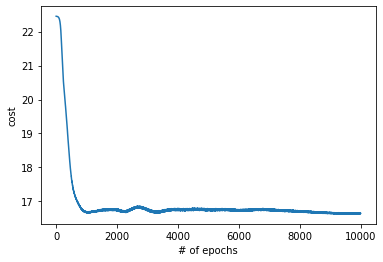

In [61]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 10000, batch_size=128, parameters=None, print_cost=True)


In [62]:
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0)
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:, :]


In [63]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))

this's neighbor words: ['input', 'us', 'case', 'cbow']
just's neighbor words: ['but', 'embedding', 'model', 'lines']
two's neighbor words: ['put', 'words', 'three', 'word']
called's neighbor words: ['of', 'word', 'we', 'weights']
which's neighbor words: ['required', 'nuerons', 'are', 'hidden']
input's neighbor words: ['good', 'with', 'given', 'sequence']
continuous's neighbor words: ['words', 'it', 'bag', 'called']
lines's neighbor words: ['a', 'which', 'of', 'the']
in's neighbor words: ['model', 'the', 'skip', 'this']
embeddings's neighbor words: ['particular', 'are', 'required', 'of']
other's neighbor words: ['word2vec', 'variant', 'one', 'vector']
of's neighbor words: ['word', 'the', 'a', 'input']
cbow's neighbor words: ['helps', 'or', 'variant', 'this']
good's neighbor words: ['accuracy', 'input', 'with', 'sequence']
nuerons's neighbor words: ['the', 'predict', 'us', 'once']
is's neighbor words: ['one', 'predict', 'bag', 'it']
it's neighbor words: ['continuous', 'inputs', 'called',

In [66]:
paras['WRD_EMB']

array([[-0.89209732, -3.11677676, -0.79012119, ...,  1.6040923 ,
         3.10709667,  0.81803109],
       [ 1.88919442, 13.35062229,  1.02518092, ...,  7.07621041,
        -3.56491074, -4.66378038],
       [ 2.1793213 , 11.69738518,  5.90534222, ...,  3.16409806,
        -0.5337679 , -6.73368607],
       ...,
       [-4.04082846,  0.81663646, -1.59273427, ..., -4.10346159,
         1.74121803,  0.65262142],
       [-7.06803813,  4.04347912,  5.36364787, ..., -8.38799681,
        -0.95461679,  0.53521974],
       [ 2.07126895,  6.63753624,  4.18762649, ..., -3.3023751 ,
        -1.73041244, -2.69823607]])

In [90]:
from gensim.models import Word2Vec

In [102]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [103]:
model = Word2Vec(sentences=common_texts)

RuntimeError: ignored

In [105]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [106]:
docVec = [nltk.word_tokenize(doc)]

In [107]:
docVec

[['The',
  'other',
  'variant',
  'of',
  'Word2Vec',
  'model',
  'works',
  'on',
  'these',
  'same',
  'lines',
  'but',
  'with',
  'a',
  'slightly',
  'different',
  'approach',
  '.',
  'In',
  'this',
  'case',
  ',',
  'the',
  'input',
  'layer',
  'is',
  'not',
  'a',
  'one',
  'hot',
  'embedding',
  'vector',
  'of',
  'just',
  'one',
  'word',
  'but',
  'two-three',
  'words',
  'put',
  'together',
  'i.e',
  '.',
  'a',
  'sequence',
  '.',
  'Then',
  'the',
  'model',
  'is',
  'trained',
  'to',
  'predict',
  'the',
  'probability',
  'vector',
  ',',
  'same',
  'as',
  'in',
  'skip-gram',
  'model',
  '.',
  'Once',
  'the',
  'model',
  'converges',
  ',',
  'we',
  'get',
  'the',
  'weights',
  'of',
  'the',
  'hidden',
  'layer',
  'nuerons',
  'which',
  'are',
  'the',
  'required',
  'embeddings',
  'of',
  'a',
  'particular',
  'word',
  '.',
  'Since',
  ',',
  'we',
  'consider',
  'a',
  'sequence',
  'of',
  'inputs',
  ',',
  'it',
  'is',
  

In [108]:
model = Word2Vec(docVec, min_count=2)

In [118]:
model.most_similar('word')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('variant', 0.16292086243629456),
 ('but', 0.09921394288539886),
 ('layer', 0.09630829095840454),
 ('with', 0.08683191239833832),
 ('model', 0.05424391105771065),
 (',', 0.04354755952954292),
 ('of', 0.021269526332616806),
 ('predict', 0.015442294999957085),
 ('is', 0.014847943559288979),
 ('sequence', 0.00835694745182991)]